In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

In [2]:
# articles dtype 변경 이유 : article_id ex '0108775015' (int로 불러오면 0 사라짐)
articles = pd.read_csv('D:/Kaggle/H&M/articles.csv', 
                       dtype = {'article_id' : 'object', 'product_code' : 'object'})
customers = pd.read_csv('D:/Kaggle/H&M/customers.csv')
transactions = pd.read_csv('D:/Kaggle/H&M/transactions_train.csv')

---
# articles

In [3]:
# article_id : 제품 id
# product_code, prod_name : 제품코드, 제품명
# product_type, product_type_name : 제품 카테고리의 코드, 제품 카테고리의 이름
# product_group_name : product_type보다 상위 제품 카테고리
# graphical_appearance_no, graphical_appearance_name : 무늬 코드, 무늬 이름
# colour_group_code, colour_group_name : 색 그룹 코드, 색 그룹 이름
# perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name : 추가 색상 정보
# department_no, department_name: : 모든 dep 코드, 이름
# index_code, index_name: :모든 index 코드, 이름
# index_group_no, index_group_name: : index 그룹 코드, 이름
# section_no, section_name: : 각 section의 코드, 이름
# garment_group_no, garment_group_name: : 각 의류 코드, 이름
# detail_desc: : 상세설명

In [4]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,0108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,0108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,0108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,0110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,0110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [5]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  object
 1   product_code                  105542 non-null  object
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [6]:
# num_unique : data column의 nunique를 한꺼번에 print하는 함수
def num_unique(data):
    for col in data.columns:
        n = data[col].nunique()
        print(f'{col} : {n}')

# product_type, deparment, section 변수 no랑 name 숫자가 안 맞음
# 코드 number가 더 많은걸 봐서 name에 중복으로 들어간게 있을수도
num_unique(articles)

article_id : 105542
product_code : 47224
prod_name : 45875
product_type_no : 132
product_type_name : 131
product_group_name : 19
graphical_appearance_no : 30
graphical_appearance_name : 30
colour_group_code : 50
colour_group_name : 50
perceived_colour_value_id : 8
perceived_colour_value_name : 8
perceived_colour_master_id : 20
perceived_colour_master_name : 20
department_no : 299
department_name : 250
index_code : 10
index_name : 10
index_group_no : 5
index_group_name : 5
section_no : 57
section_name : 56
garment_group_no : 21
garment_group_name : 21
detail_desc : 43404


In [7]:
# num_na : data column의 na 개수, 비율 print하는 함수
def num_na(data):
    for col in data.columns:
        n = data[col].isnull().sum() # na 개수
        per = (n / data[col].shape[0]) * 100 # na 비율
        print(f'{col} : (na 개수 : {n}) (na 비율 : {per})')

# detail_desc : 426 na
num_na(articles)

article_id : (na 개수 : 0) (na 비율 : 0.0)
product_code : (na 개수 : 0) (na 비율 : 0.0)
prod_name : (na 개수 : 0) (na 비율 : 0.0)
product_type_no : (na 개수 : 0) (na 비율 : 0.0)
product_type_name : (na 개수 : 0) (na 비율 : 0.0)
product_group_name : (na 개수 : 0) (na 비율 : 0.0)
graphical_appearance_no : (na 개수 : 0) (na 비율 : 0.0)
graphical_appearance_name : (na 개수 : 0) (na 비율 : 0.0)
colour_group_code : (na 개수 : 0) (na 비율 : 0.0)
colour_group_name : (na 개수 : 0) (na 비율 : 0.0)
perceived_colour_value_id : (na 개수 : 0) (na 비율 : 0.0)
perceived_colour_value_name : (na 개수 : 0) (na 비율 : 0.0)
perceived_colour_master_id : (na 개수 : 0) (na 비율 : 0.0)
perceived_colour_master_name : (na 개수 : 0) (na 비율 : 0.0)
department_no : (na 개수 : 0) (na 비율 : 0.0)
department_name : (na 개수 : 0) (na 비율 : 0.0)
index_code : (na 개수 : 0) (na 비율 : 0.0)
index_name : (na 개수 : 0) (na 비율 : 0.0)
index_group_no : (na 개수 : 0) (na 비율 : 0.0)
index_group_name : (na 개수 : 0) (na 비율 : 0.0)
section_no : (na 개수 : 0) (na 비율 : 0.0)
section_name : (na 개수 : 0) (na 비율 

In [8]:
import matplotlib.ticker as mtick
# plot_bar : sorted horizontal barplots
def plot_bar(database, col, figsize = (13,5), pct=False, label='articles'):
    fig, ax = plt.subplots(figsize = figsize, facecolor='lightgray')
    for loc in ['bottom', 'left']:
        ax.spines[loc].set_visible(True)
        ax.spines[loc].set_linewidth(2)
        ax.spines[loc].set_color('gray')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # 백분율
    if pct:
        data = database[col].value_counts()
        data = data.div(data.sum()).mul(100)
        data = data.reset_index()
        ax = sns.barplot(data=data, x=col, y='index', color='royalblue', lw=1.5, ec='black', zorder=2)
        ax.set_xlabel('% of ' + label, fontsize=10, weight='bold')
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    else:
        data = database[col].value_counts().reset_index()
        ax = sns.barplot(data=data, x=col, y='index', color='royalblue', lw=1.5, ec='black', zorder=2)        
        ax.set_xlabel('# of articles' + label)
        
    ax.grid(zorder=0)
    ax.text(0, -0.75, col, color='black', fontsize=10, ha='left', va='bottom', weight='bold', style='italic')
    ax.set_ylabel('')
        
    plt.show()

### index columns

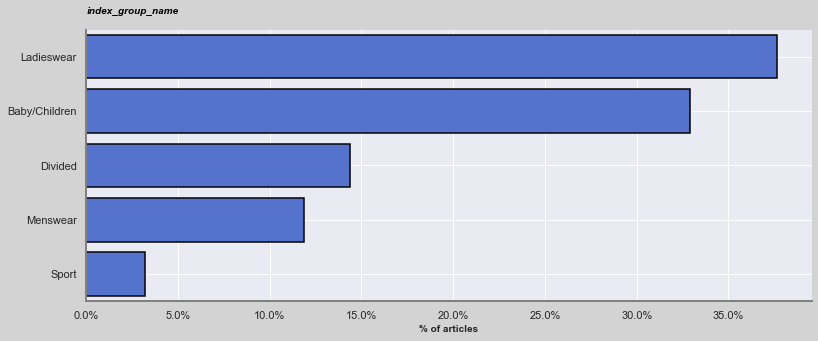

In [9]:
# Ladies wear, Baby/Childern이 70% 가량
plot_bar(articles, 'index_group_name', pct = True)

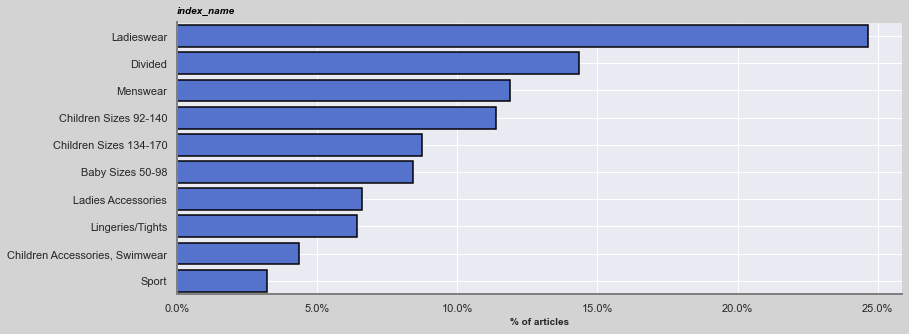

In [10]:
# ladies wear, divided가 상위 두 그룹
plot_bar(articles, 'index_name', pct = True)

In [11]:
# Baby/Childeren, Ladieswear만 세부 분류 있음
# Baby는 주로 사이즈별로, Ladieswear는 주로 종류별로
articles.groupby(['index_group_name', 'index_name']).size()

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
dtype: int64

In [12]:
# divided category 특성 파악을 위한 예시 보기
art_divided = articles[articles['index_group_name'] == 'Divided']
art_divided[['prod_name', 'product_type_name', 'index_name', 'garment_group_name', 'detail_desc']].drop_duplicates().head(10)

,prod_name,product_type_name,index_name,garment_group_name,detail_desc
78,Sigge sneaker sock 5p,Socks,Divided,"Under-, Nightwear",Fine-knit trainer socks in various colours.
124,Eva chelsea boot,Boots,Divided,Shoes,Chelsea boots with elasticated gores in the si...
125,Jenny 5-pack,Socks,Divided,"Under-, Nightwear",Fine-knit socks.
149,Lena over knee.,Socks,Divided,"Under-, Nightwear",Fine-knit over-the-knee socks.
175,Tina leggings,Leggings/Tights,Divided,Jersey Basic,Leggings in extra sturdy jersey with an elasti...
176,Heavy jsy long leg,Leggings/Tights,Divided,Jersey Basic,Leggings in extra sturdy jersey with an elasti...
186,Jodi skirt,Skirt,Divided,Jersey Basic,"Short, bell-shaped skirt in stretch jersey wit..."
187,Long Leg Leggings,Leggings/Tights,Divided,Jersey Basic,Leggings in stretch jersey with an elasticated...
189,Raven skirt,Skirt,Divided,Jersey Basic,Short jersey skirt with an elasticated waist.
193,Carolina sweater (1),Sweater,Divided,Jersey Basic,Long-sleeved top in sweatshirt fabric with rib...


### product columns

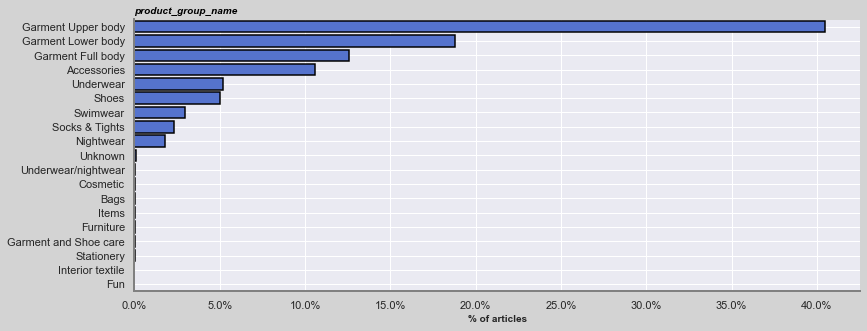

In [13]:
plot_bar(articles, 'product_group_name', pct = True)

In [14]:
# product category counts
# 132개의 product type 
# product_type_no와 nunique 같아짐 -> 중복으로 쓰는 type_name 있는듯
articles.groupby(['product_group_name','product_type_name']).size()

product_group_name   product_type_name
Accessories          Accessories set         7
                     Alice band              6
                     Baby Bib                3
                     Bag                  1280
                     Beanie                 56
                                          ... 
Underwear            Underwear corset        7
                     Underwear set          47
Underwear/nightwear  Sleep Bag               6
                     Sleeping sack          48
Unknown              Unknown               121
Length: 132, dtype: int64

In [15]:
# Number of subcategories
for group in articles['product_group_name'].unique():
    n = len(articles.groupby(['product_group_name','product_type_name']).size()[group])
    print(f'{group} : {n}')

Garment Upper body : 15
Underwear : 11
Socks & Tights : 3
Garment Lower body : 5
Accessories : 38
Items : 5
Nightwear : 4
Unknown : 1
Underwear/nightwear : 2
Shoes : 16
Swimwear : 6
Garment Full body : 6
Cosmetic : 2
Interior textile : 3
Bags : 6
Furniture : 1
Garment and Shoe care : 6
Fun : 1
Stationery : 1


### color columns

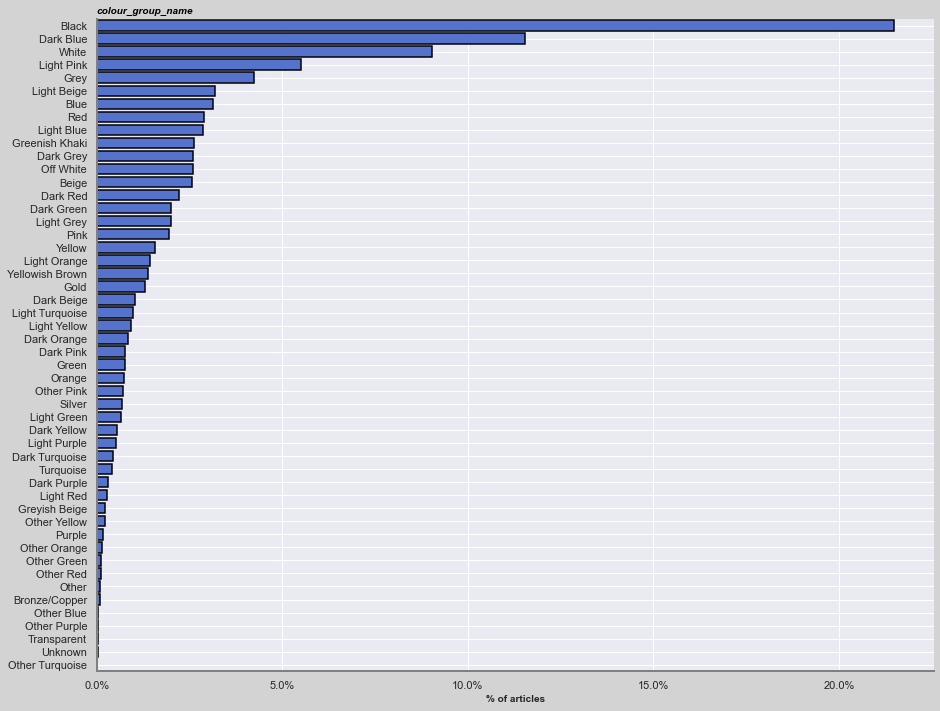

In [16]:
plot_bar(articles, 'colour_group_name', figsize = (15, 12), pct = True)

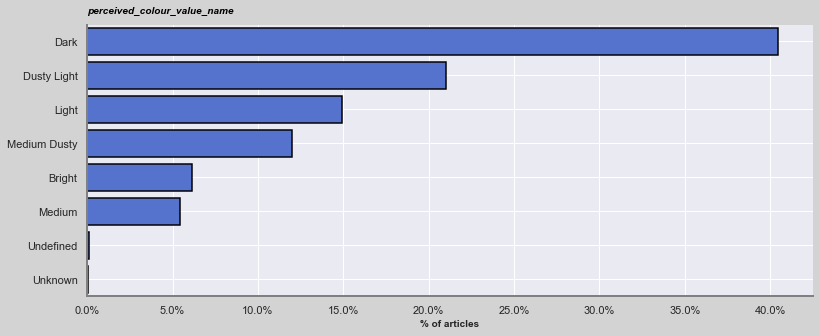

In [17]:
plot_bar(articles, 'perceived_colour_value_name', pct = True)

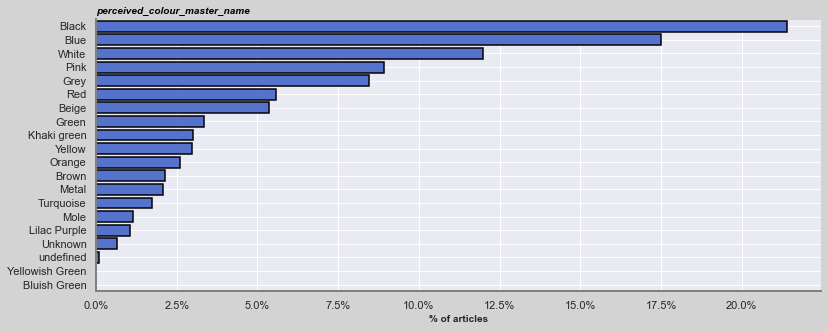

In [18]:
plot_bar(articles, 'perceived_colour_master_name', pct = True)

In [19]:
# There are three different types of columns regarding to colour feature
# We need to find some differences between columns

In [20]:
from random import sample

def show_images_in_category(column, value, no_imgs = 3):
    data = articles[articles[column] == value]
    cat_ids = data['article_id'].iloc[:no_imgs].to_list()
    
    fig, ax = plt.subplots(1, no_imgs, figsize = (12, 4))
    
    for i, prod_id in enumerate(cat_ids):
        folder = str(prod_id)[:3]
        file_path = f'D:/Kaggle/H&M/images/{folder}/{prod_id}.jpg'
        
        img = plt.imread(file_path)
        ax[i].imshow(img, aspect = 'equal')
        ax[i].grid(False)
        ax[i].set_xticks([], [])
        ax[i].set_yticks([], [])
        ax[i].set_xlabel(articles[articles['article_id'] == prod_id]['prod_name'].iloc[0])
        
    fig.suptitle(f'Articles from a {value} category')
    plt.show()

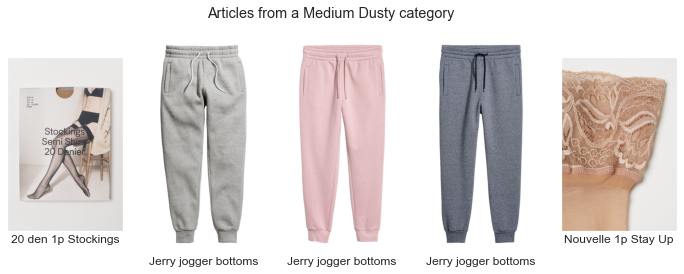

In [21]:
# perceived_colour_value_name : 전체적인 tone
show_images_in_category('perceived_colour_value_name', 'Medium Dusty', 5)

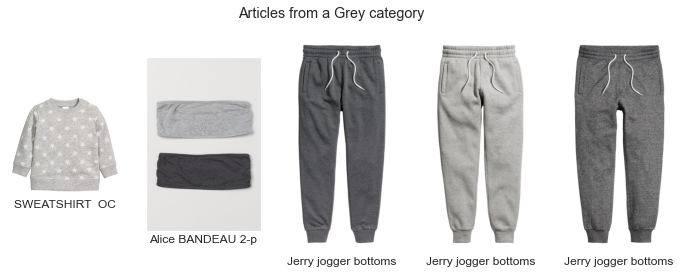

In [22]:
# perceived_colour_master_name
show_images_in_category('perceived_colour_master_name', 'Grey', 5)

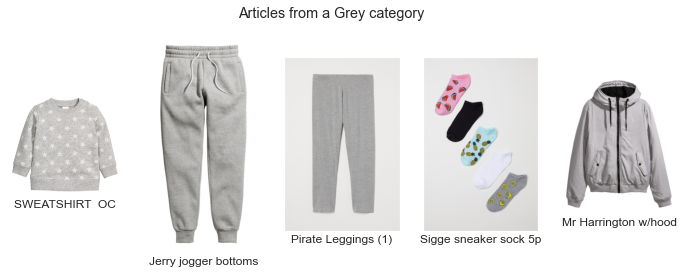

In [23]:
# colour_group_name : 가장 세부적인 사항인듯
show_images_in_category('colour_group_name', 'Grey', 5)

In [24]:
# colour_group_name, perceived_colour_value_name, perceived_colour_master_name
def show_images_by_color(group, value, master, no_imgs = 4):
    data = articles[(articles['colour_group_name'] == group) &
                    (articles['perceived_colour_value_name'] == value) &
                    (articles['perceived_colour_master_name'] == master)]
    cat_ids = data['article_id'].iloc[:no_imgs].to_list()
    
    fig, ax = plt.subplots(nrows = 1, ncols = no_imgs, figsize = (12, 4))
    
    for i, prod_id in enumerate(cat_ids):
        folder = prod_id[:3]
        file_path = f'D:/Kaggle/H&M/images/{folder}/{prod_id}.jpg'
    
        img = plt.imread(file_path)
        ax[i].imshow(img, aspect = 'equal')
        ax[i].grid(False)
        ax[i].set_xticks([],[])
        ax[i].set_yticks([],[])
        ax[i].set_xlabel(articles[articles['article_id'] == prod_id]['prod_name'].iloc[0])
        
    fig.suptitle(f'Color group : {group}, Perceived color value : {value}, Perceived color master : {master}')
    plt.show()

In [25]:
articles.groupby(['perceived_colour_value_name','perceived_colour_master_name']).size()

perceived_colour_value_name  perceived_colour_master_name
Bright                       Blue                             586
                             Green                            380
                             Lilac Purple                     114
                             Metal                           1350
                             Orange                           522
                                                             ... 
Medium Dusty                 Turquoise                        135
                             Unknown                           46
                             Yellow                           327
Undefined                    undefined                        105
Unknown                      Unknown                           28
Length: 79, dtype: int64

### graphical columns

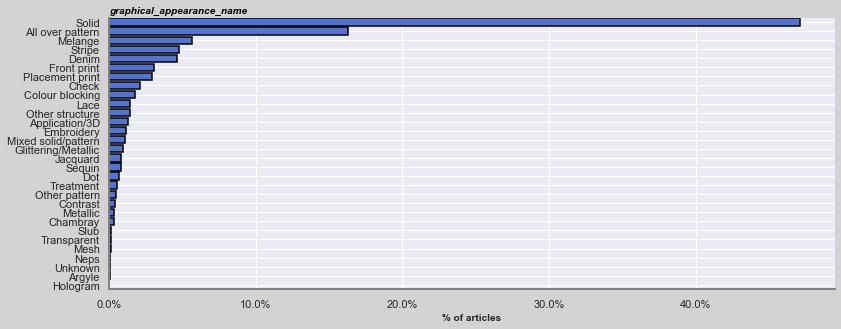

In [26]:
# solid pattern이 거의 절반가량
plot_bar(articles, 'graphical_appearance_name', pct = True)

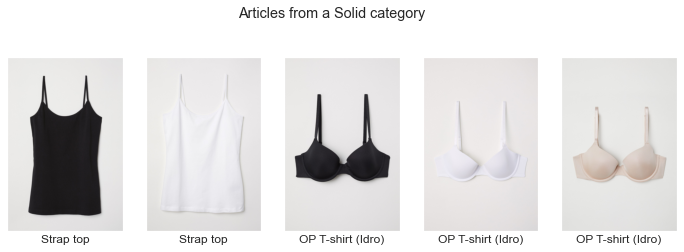

In [27]:
# solid : 무늬 없음
show_images_in_category('graphical_appearance_name', 'Solid', 5)

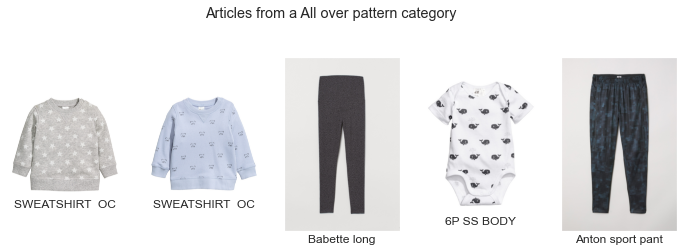

In [28]:
show_images_in_category('graphical_appearance_name', 'All over pattern', 5)

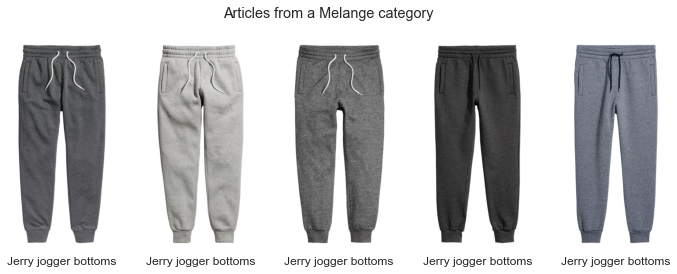

In [29]:
show_images_in_category('graphical_appearance_name', 'Melange', 5)

---
# customers

In [30]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [31]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [32]:
# FN, Active -> binary feature (NaN에 0 값 채워넣기)
print(customers.FN.unique(), customers.Active.unique())
customers.FN.fillna(0, inplace = True)
customers.Active.fillna(0, inplace = True)
print(customers.FN.unique(), customers.Active.unique())

[nan  1.] [nan  1.]
[0. 1.] [0. 1.]


In [33]:
num_unique(customers)

customer_id : 1371980
FN : 2
Active : 2
club_member_status : 3
fashion_news_frequency : 4
age : 84
postal_code : 352899


In [34]:
num_na(customers)

customer_id : (na 개수 : 0) (na 비율 : 0.0)
FN : (na 개수 : 0) (na 비율 : 0.0)
Active : (na 개수 : 0) (na 비율 : 0.0)
club_member_status : (na 개수 : 6062) (na 비율 : 0.44184317555649494)
fashion_news_frequency : (na 개수 : 16009) (na 비율 : 1.1668537442236768)
age : (na 개수 : 15861) (na 비율 : 1.1560664149623172)
postal_code : (na 개수 : 0) (na 비율 : 0.0)


In [35]:
print(customers.FN.value_counts())
print(customers.Active.value_counts())

0.0    895050
1.0    476930
Name: FN, dtype: int64
0.0    907576
1.0    464404
Name: Active, dtype: int64


ACTIVE        1272491
PRE-CREATE      92960
NaN              6062
LEFT CLUB         467
Name: club_member_status, dtype: int64


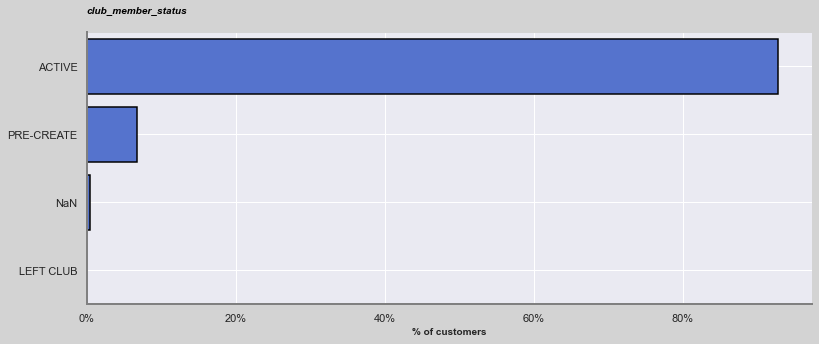

In [36]:
customers.club_member_status.fillna('NaN', inplace = True)
print(customers.club_member_status.value_counts())
plot_bar(customers, 'club_member_status', pct = True, label = 'customers')

NONE         877711
Regularly    477416
NaN           16009
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64


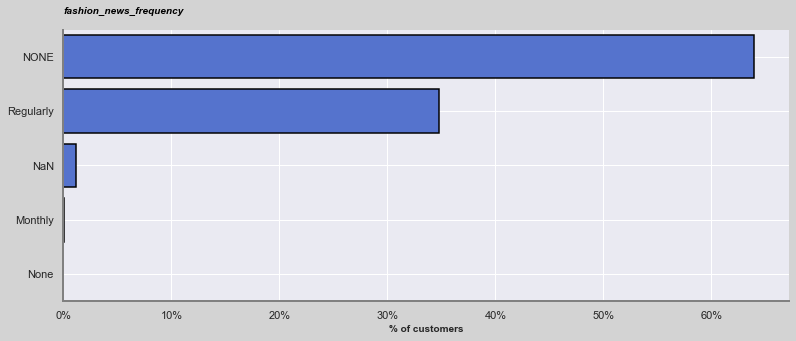

In [37]:
customers.fashion_news_frequency.fillna('NaN', inplace = True)
print(customers.fashion_news_frequency.value_counts())
plot_bar(customers, 'fashion_news_frequency', pct = True, label = 'customers')
# NONE이 다른 방식으로 코딩됨 -> 하나로 합치자

In [38]:
def plot_hist(database, col, figsize = (13,5), bins = 50, median = False):
    fig, ax = plt.subplots(figsize = figsize, facecolor='lightgray')
    ax = sns.histplot(data = database, x = col, bins = bins, 
                      color = 'orange', stat = 'percent')
    
    for loc in ['bottom', 'left']:
        ax.spines[loc].set_visible(True)
        ax.spines[loc].set_linewidth(2)
        ax.spines[loc].set_color('black')
    # ax.spines['right'].set_visible(False)
    # ax.spines['top'].set_visible(False)
    ax.set_xlabel(f'Distribution of {col}', fontsize=10, weight='bold')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.text(12, 5.5, f'Distribution of {col}', color = 'black', fontsize = 10,
            ha = 'left', weight = 'bold', style = 'italic')
    # median line
    if median:
        median = database[col].median()
        ax.axvline(x = median, color = 'red', ls = '--')
        ax.text(median, 3.5, f'median : {median}', rotation = 'vertical', ha = 'right')
        
    plt.show()

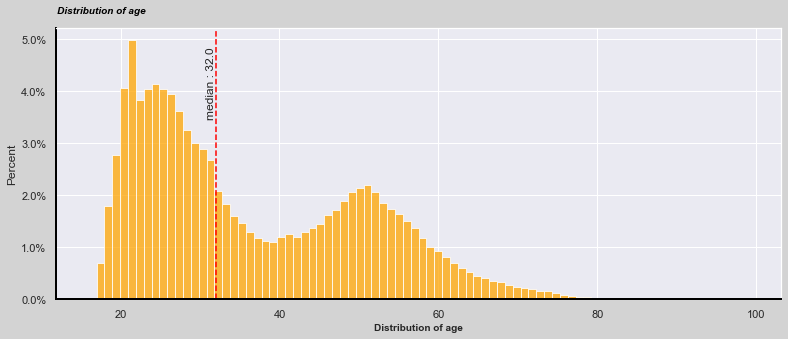

In [39]:
plot_hist(customers, 'age', bins = customers['age'].nunique(), median = True)

---
# transaction

In [40]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [41]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [42]:
num_na(transactions)

t_dat : (na 개수 : 0) (na 비율 : 0.0)
customer_id : (na 개수 : 0) (na 비율 : 0.0)
article_id : (na 개수 : 0) (na 비율 : 0.0)
price : (na 개수 : 0) (na 비율 : 0.0)
sales_channel_id : (na 개수 : 0) (na 비율 : 0.0)


In [43]:
num_unique(transactions)

t_dat : 734
customer_id : 1362281
article_id : 104547
price : 9857
sales_channel_id : 2


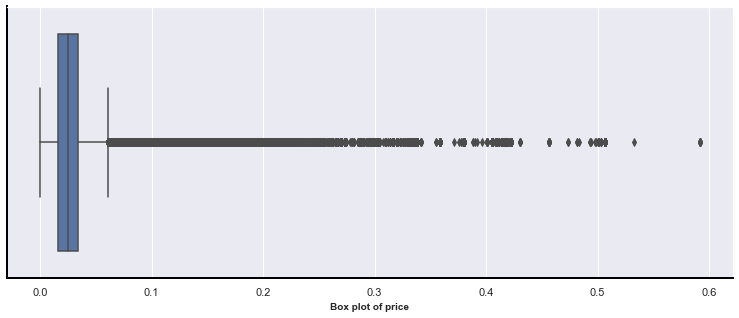

Q1 = 0.0158135593220338, Q3 = 0.0338813559322033


In [44]:
# box plot of price variable
fig, ax = plt.subplots(figsize = (13, 5))
ax = sns.boxplot(data = transactions, x = 'price')
    
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

ax.set_xlabel('Box plot of price', fontsize=10, weight='bold')
plt.show()

print(f'Q1 = {transactions.price.quantile(.25)}, Q3 = {transactions.price.quantile(.75)}')

# We need to detect and remove outliers using several methods.

In [46]:
transactions.t_dat = pd.to_datetime(transactions.t_dat)
print(f'Date range is from {transactions.t_dat.min()} to {transactions.t_dat.max()}')

Date range is from 2018-09-20 00:00:00 to 2020-09-22 00:00:00


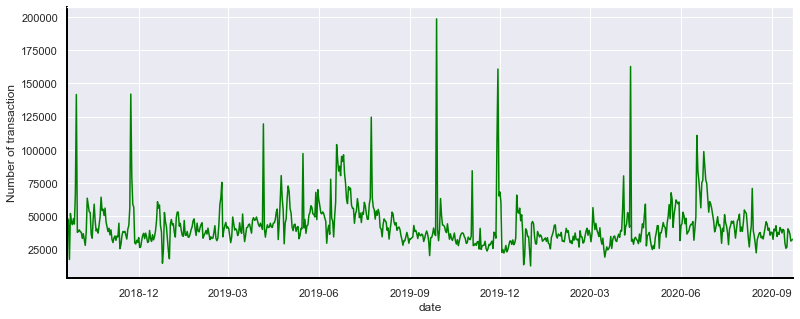

In [47]:
from matplotlib import dates

# Number of transaction per day
t_day_series = transactions.groupby(['t_dat']).size()

fig, ax = plt.subplots(figsize = (13, 5))
ax = sns.lineplot(x = t_day_series.index, y = t_day_series.values, color = 'green')

for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
    
ax.set_xlabel('date')
ax.set_ylabel('Number of transaction')
ax.set_xticks(range(0,len(t_day_series), ))
ax.xaxis.set_major_locator(dates.MonthLocator(interval = 3))
ax.set_xlim(t_day_series.index.min(), t_day_series.index.max())

plt.show()    